In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ftplib import FTP
import urllib
import pandas as pd

In [162]:
year = 2015 # 2002 through 2015 available
iip_url_base = 'ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G00807/' 
iip_filename = f'IIP_{year}IcebergSeason.csv'
iip_url = iip_url_base + iip_filename

In [163]:
r = urllib.request.urlretrieve(iip_url_base)
#reopen(r[0]).readlines()

In [164]:
print(iip_url)

ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G00807/IIP_2015IcebergSeason.csv


In [165]:
r = urllib.request.urlretrieve(iip_url)
df = pd.read_csv(r[0])

In [166]:
df

,ICE-YEAR,BERG_NUMBER,DATE,TIME,LATITUDE,LONGITUDE,METHOD,SIZE,SHAPE,SOURCE
0,2015,1,11/21/2014,1639,59.98,-63.44,VIS,GEN,GEN,GCFR
1,2015,1,12/13/2014,2138,58.32,-61.18,SAT-HIGH,RAD,RAD,RSA2
2,2015,2,11/29/2014,2147,58.57,-60.53,SAT-HIGH,RAD,RAD,RSA2
3,2015,2,12/6/2014,2142,58.21,-60.05,SAT-HIGH,RAD,RAD,RSA2
4,2015,2,12/16/2014,1553,57.69,-59.16,VIS,LG,GEN,GTJZ
5,2015,3,11/29/2014,2147,57.98,-60.40,SAT-HIGH,RAD,RAD,RSA2
6,2015,4,11/30/2014,1900,58.35,-61.05,VIS,GEN,GEN,GCFR
7,2015,5,12/3/2014,2130,58.34,-61.05,SAT-HIGH,RAD,RAD,RSA2
8,2015,5,12/6/2014,2142,58.34,-61.05,SAT-HIGH,RAD,RAD,RSA2
9,2015,6,12/3/2014,2130,59.86,-61.65,SAT-HIGH,RAD,RAD,RSA2


In [170]:
# Latitude is North South

print('min lat: {}, min lon: {};\nmax lat: {}, max lon: {}'
      .format(df['LATITUDE'].min(), df['LONGITUDE'].min(),
              df['LATITUDE'].max(), df['LONGITUDE'].max()))

min lat: 42.85, min lon: -64.04;
max lat: 60.47, max lon: -42.08


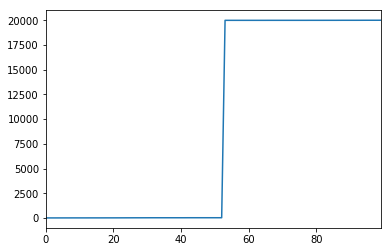

In [19]:
df['BERG_NUMBER'][:100].plot()

In [192]:
n = df.BERG_NUMBER.mode()[0]

In [193]:
df.loc[df['BERG_NUMBER'] == n]

,ICE-YEAR,BERG_NUMBER,DATE,TIME,LATITUDE,LONGITUDE,METHOD,SIZE,SHAPE,SOURCE
6312,2015,21511,4/24/2015,1558,48.04,-50.71,R/V,MED,GEN,GTJZ
6313,2015,21511,4/25/2015,1104,48.04,-50.72,R/V,GEN,GEN,GPGR
6314,2015,21511,4/28/2015,1014,48.19,-51.10,R/V,LG,GEN,GPGR
6315,2015,21511,5/11/2015,1039,48.04,-51.58,R/V,LG,GEN,GTJZ
6316,2015,21511,5/14/2015,1010,48.08,-51.83,R/V,LG,GEN,GTJZ
6317,2015,21511,6/3/2015,1055,47.84,-50.47,R/V,GEN,GEN,3EUY
6318,2015,21511,6/15/2015,1113,48.49,-50.14,R/V,LG,GEN,GTJZ
6319,2015,21511,6/16/2015,1442,48.16,-50.01,R/V,LG,TAB,GTJZ
6320,2015,21511,6/17/2015,1300,48.09,-50.02,R/V,LG,GEN,GMRS
6321,2015,21511,6/18/2015,1249,48.08,-49.76,VIS,LG,TAB,GTJZ


In [127]:
def num_unique_berg_ids(df, col_name):
    # import pandas as pd
    if not isinstance(df, pd.DataFrame):
        print('Error: argument df must be a pandas dataframe.')
    elif not isinstance(col_name, str):
        print('Error: argument col_name must be a string.')
    else:
        #return df[col_name].size  # non-unique obs
        return df[col_name].nunique()

In [128]:
num_unique_berg_ids(df, 'BERG_NUMBER')

10172

In [67]:
def arr_unique_berg_ids(df, col_name):
    # import pandas as pd
    if not isinstance(df, pd.DataFrame):
        print('Error: argument df must be a pandas dataframe.')
    elif not isinstance(col_name, str):
        print('Error: argument col_name must be a string.')
    else:
        return df[col_name].unique()    

In [70]:
arr_unique_berg_ids(df, 'BERG_NUMBER')

array([    1,     2,     3, ..., 30166, 30167, 30168])

In [130]:
def obs_per_berg(df, col_name):
    # import pandas as pd
    if not isinstance(df, pd.DataFrame):
        print('Error: argument df must be a pandas dataframe.')
    elif not isinstance(col_name, str):
        print('Error: argument col_name must be a string.')
    else:
        return df.groupby([col_name]).size()
    

In [131]:
unique_obs_df = obs_per_berg(df, 'BERG_NUMBER')

In [122]:
unique_obs_df.describe()

count    10172.000000
mean         1.684919
std          1.713221
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
dtype: float64

In [182]:
unique_obs_df.argmax()

22117

In [187]:
df[22117]

KeyError: 22117

In [135]:
data = np.vstack((df['LATITUDE'], df['LONGITUDE']))

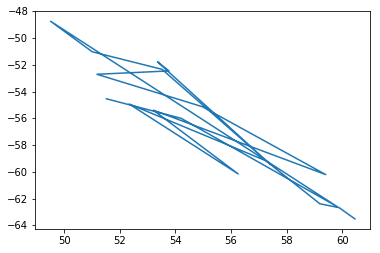

In [137]:
plt.plot(df['LATITUDE'][:20], df['LONGITUDE'][:20])

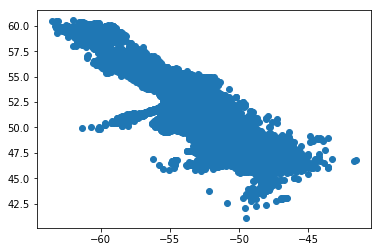

In [144]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'])

In [22]:
from mpl_toolkits.basemap import Basemap

In [180]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


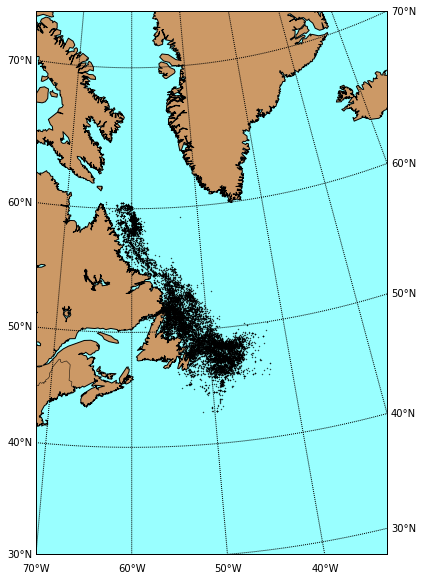

In [181]:
# Lambert Conformal Conic map.
min_lon = -70.
max_lon = -10.
min_lat = 30.
max_lat = 70.

m = Basemap(llcrnrlon = min_lon, llcrnrlat = min_lat,
            urcrnrlon = max_lon, urcrnrlat = max_lat,
            projection = 'lcc', lat_1 = 20.,
            lat_2 = 40., lon_0 = -60.,
            resolution = 'l', area_thresh = 1000.)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(0,100,10),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,10),labels=[0,0,0,1])
plt.title('')

#m.plot(df['LONGITUDE'], df['LATITUDE'], linewidth = 1.5, color = 'r')
x, y = m(list(df['LONGITUDE']), list(df['LATITUDE']))
m.scatter(x,y, s=.5, marker ='.',  color = 'k')

plt.show()

/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/evankielley/.conda/envs/my_root/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


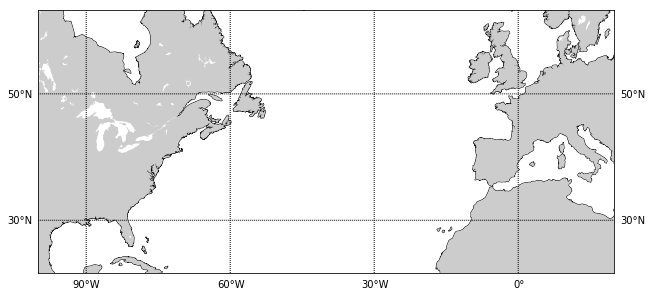

In [173]:
# create new figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

m.drawcoastlines(zorder=0)
m.fillcontinents(zorder=0)
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('')

m.plot(df['LONGITUDE'], df['LATITUDE'], linewidth = 1.5, color = 'r')
#m.scatter(df['LONGITUDE'], df['LATITUDE'], marker ='o', color = 'k')


plt.show()

In [171]:
df['LONGITUDE']

0       -63.44
1       -61.18
2       -60.53
3       -60.05
4       -59.16
5       -60.40
6       -61.05
7       -61.05
8       -61.05
9       -61.65
10      -60.40
11      -59.90
12      -58.71
13      -58.73
14      -59.03
15      -54.83
16      -54.78
17      -53.20
18      -52.84
19      -53.29
20      -54.54
21      -54.17
22      -53.53
23      -53.94
24      -52.96
25      -52.28
26      -47.38
27      -47.35
28      -46.49
29      -46.00
         ...  
13825   -57.75
13826   -57.74
13827   -57.72
13828   -57.74
13829   -57.72
13830   -57.76
13831   -57.73
13832   -57.78
13833   -58.09
13834   -57.78
13835   -58.49
13836   -58.54
13837   -58.53
13838   -58.65
13839   -60.71
13840   -60.88
13841   -59.22
13842   -60.27
13843   -59.46
13844   -58.56
13845   -60.58
13846   -59.65
13847   -60.66
13848   -61.22
13849   -61.22
13850   -61.19
13851   -61.24
13852   -62.06
13853   -57.31
13854   -57.13
Name: LONGITUDE, Length: 13855, dtype: float64